In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import os
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',500)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from preprocessingFunction import *

In [76]:
train=pd.read_csv("HousePrice/train.csv")

Step 1

In [77]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [78]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [79]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
train.shape

(1460, 81)

In [82]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [83]:
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [84]:
train.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [85]:
train.select_dtypes(include=['float'])

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [86]:
train.select_dtypes(include=['float64']).dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

In [87]:
len(train.select_dtypes(include=['float64']).dtypes)

3

In [88]:
data_types=['int32','int64','float32','float64','object','bool']

def display_data_information(data,data_types,dataframe_name):
    print("Information of ",dataframe_name,": Rows = ",data.shape[0], "| Columns = ",data.shape[1],"\n")
    data.info()
    print("\n")
    for variable in data_types:
        data_type = data.select_dtypes(include=[variable]).dtypes
        if len(data_type) > 0:
            #print(str(len(data_type))+" "+variable +" Features\n"+str(data_type)+"\n")
            print(str(len(data_type))+" "+variable +" Features")

In [89]:
# data_types=['int32','int64','float32','float64','object','bool']
display_data_information(train,data_types,'train')

Information of  train : Rows =  1460 | Columns =  81 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 1

In [90]:
display_head_tail(train,head_rows=3,tail_rows=3)

'Data Head and Tail : '

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [91]:
numerical_features,categorical_features=display_data_description(train)

Data Description : 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The Identified Numeric Features are : 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
 


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


The Identified Caterogical Features are :
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [92]:
numerical_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [93]:
pd.set_option('display.max_rows',500)

train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [94]:
k=[features for features in train.columns if train[features].isna().sum()>0]

In [95]:
# findng the percentage of missing value
null_percent=train.apply(lambda x: np.round(100*x.isnull().sum()/x.shape[0],4))
null_count=train.isna().sum()
# covert these two in a data frame
train_null_df=pd.DataFrame([null_percent,null_count]).T
train_null_df

,0,1
Id,0.0000,0.0
MSSubClass,0.0000,0.0
MSZoning,0.0000,0.0
LotFrontage,17.7397,259.0
LotArea,0.0000,0.0
Street,0.0000,0.0
Alley,93.7671,1369.0
LotShape,0.0000,0.0
LandContour,0.0000,0.0
Utilities,0.0000,0.0


In [96]:
train_null_df.columns=['null_percent','null_count']
train_null_df.sort_values(by='null_percent',ascending=False,inplace=True)
train_null_df.reset_index(inplace=True)
train_null_df.head(10)

,index,null_percent,null_count
0,PoolQC,99.5205,1453.0
1,MiscFeature,96.3014,1406.0
2,Alley,93.7671,1369.0
3,Fence,80.7534,1179.0
4,FireplaceQu,47.2603,690.0
5,LotFrontage,17.7397,259.0
6,GarageYrBlt,5.5479,81.0
7,GarageCond,5.5479,81.0
8,GarageType,5.5479,81.0
9,GarageFinish,5.5479,81.0


In [97]:
# droping the columns more than 58% of null values
train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [98]:
numerical_columns=train.select_dtypes(np.number)

In [99]:
numerical_columns

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [100]:
numerical_columns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [101]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


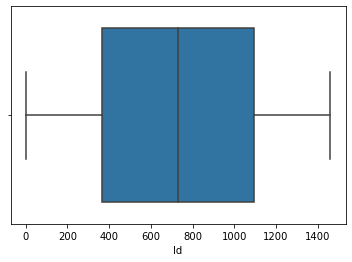

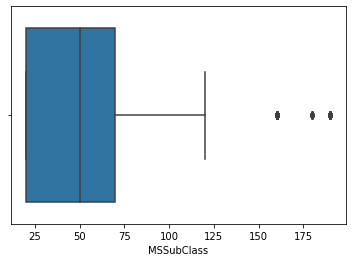

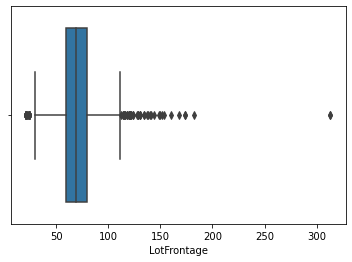

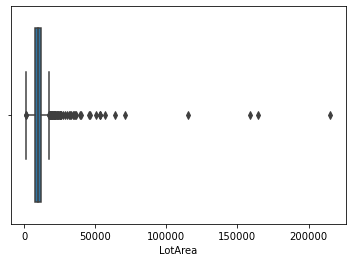

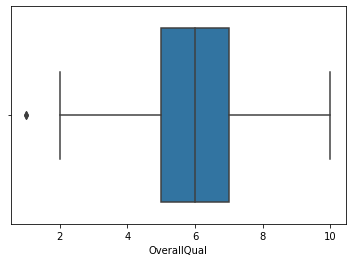

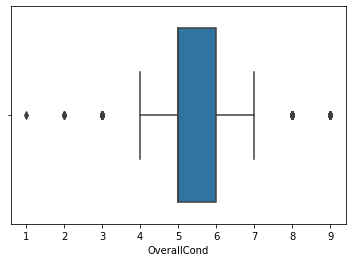

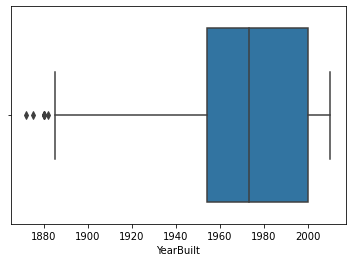

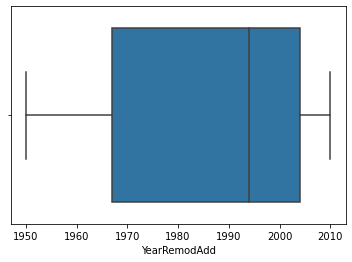

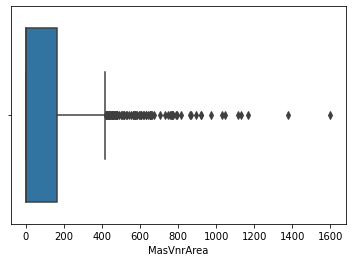

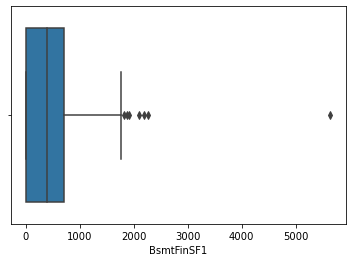

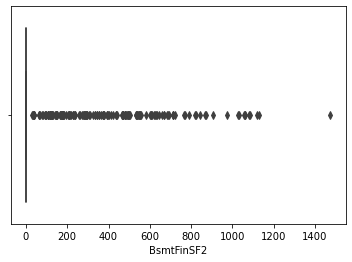

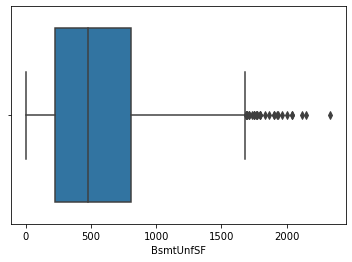

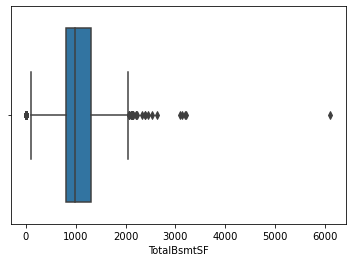

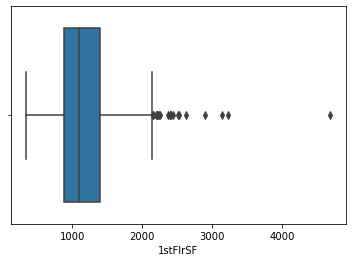

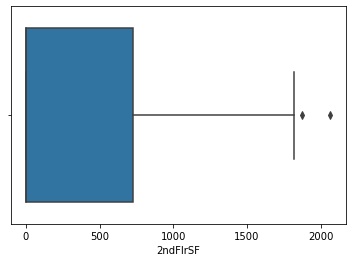

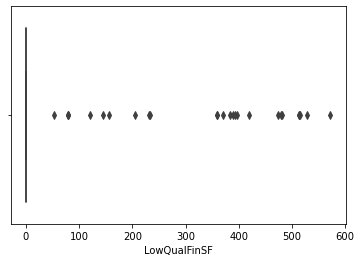

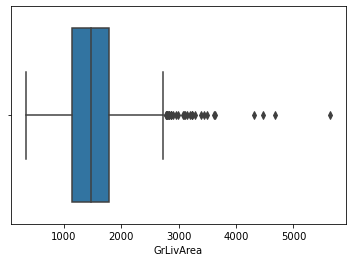

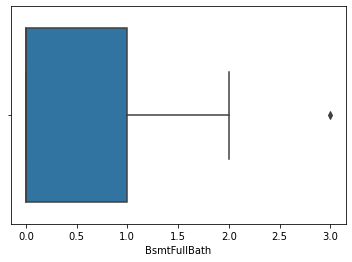

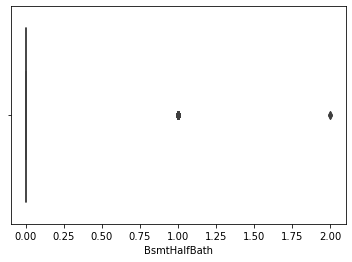

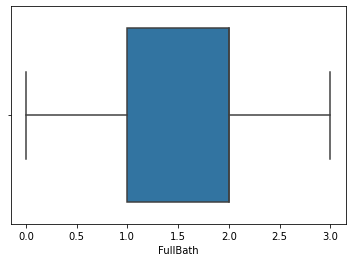

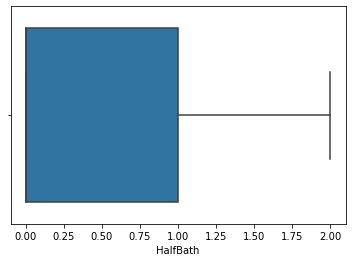

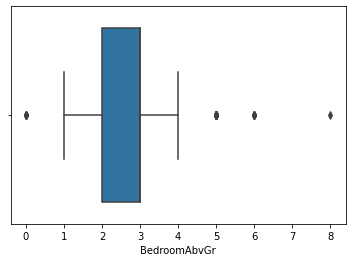

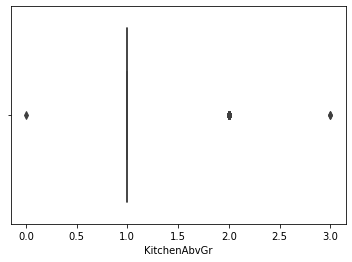

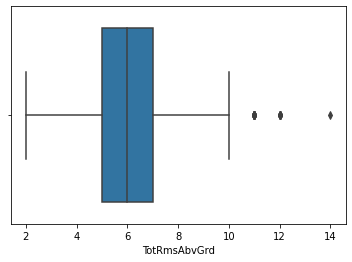

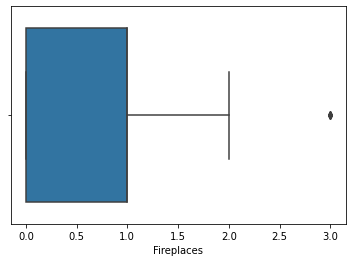

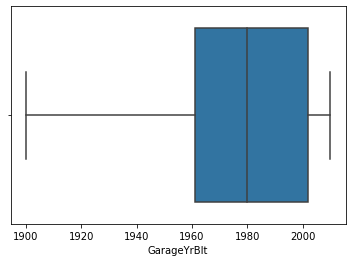

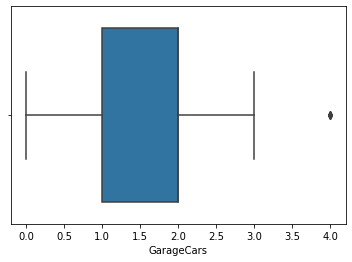

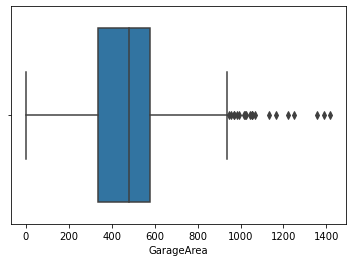

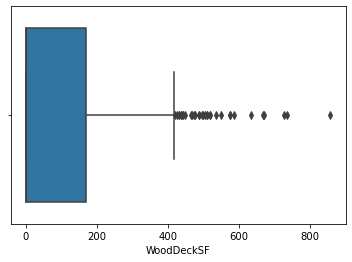

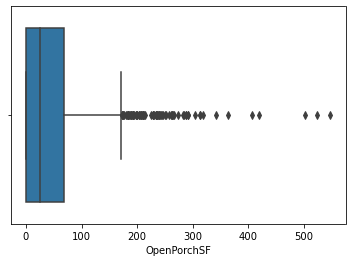

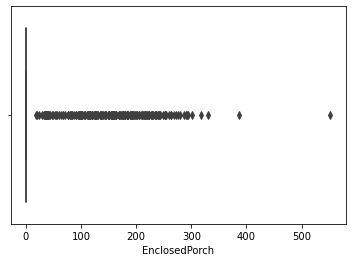

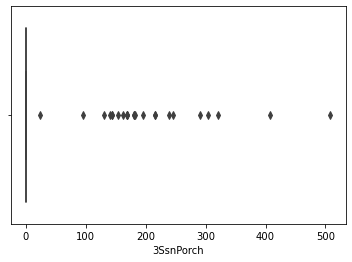

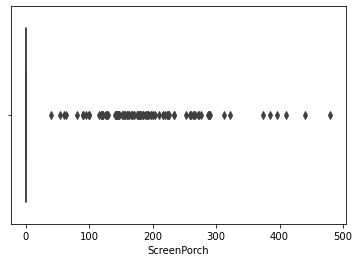

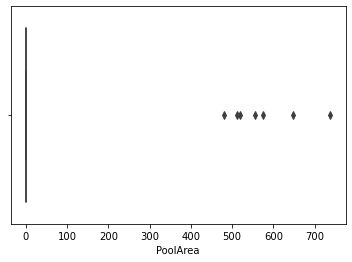

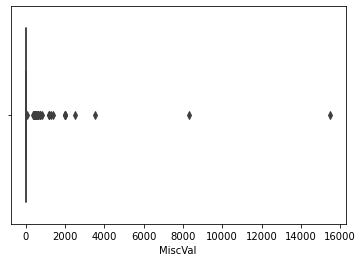

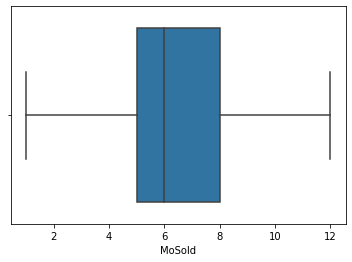

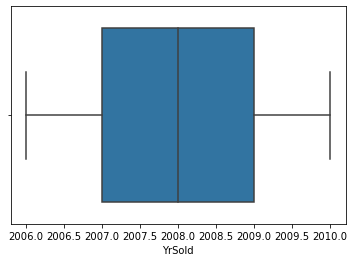

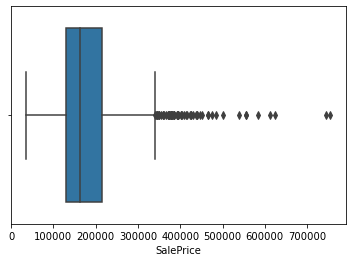

In [102]:
for features in numerical_columns.columns:
    sns.boxplot(features,data=train)
    plt.show()

### Missing value treatment

In [103]:
# we can drop the columns greater than 1000 missing values
train=pd.read_csv("HousePrice/train.csv")
for features in k:
    print(features," : ",train[features].isna().sum())    
print("more than 1000 missing values")
for features in k:
    if train[features].isna().sum()>1000:
        print(features,":",train[features].isna().sum())
        train=train.drop(features,axis=1)

LotFrontage  :  259
Alley  :  1369
MasVnrType  :  8
MasVnrArea  :  8
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinType2  :  38
Electrical  :  1
FireplaceQu  :  690
GarageType  :  81
GarageYrBlt  :  81
GarageFinish  :  81
GarageQual  :  81
GarageCond  :  81
PoolQC  :  1453
Fence  :  1179
MiscFeature  :  1406
more than 1000 missing values
Alley : 1369
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


In [104]:
train=train.drop('MasVnrType',axis=1)

In [105]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [106]:
train.shape

(1460, 76)

In [107]:
len([features for features in train.columns if train[features].isna().sum()>0])

14

In [108]:
null_features=[features for features in train.columns if train[features].isna().sum()>0]

In [109]:
null_features

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [110]:
train['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [111]:
train['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [112]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [113]:
train['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [114]:
train['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [115]:
train['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [116]:
train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [117]:
train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [118]:
train['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [119]:
train['BsmtQual'].isna().sum()

37

In [120]:
mode=train['BsmtCond'].mode()[0]

In [121]:
for i in null_features:
    if train[i].dtype=='object':
        print(i,"(unique value) :",train[i].unique(),"\n")
        print(i,"(value counts) :",train[i].value_counts(),"\n")
        train[i].fillna(train[i].mode()[0],inplace=True)
    else:
        print(i,"(unique value) :",train[i].unique(),"\n")
        print(i,"(value counts) :",train[i].value_counts(),"\n")
        print("numerical null values are",i)
        train[i].fillna(train[i].median(),inplace=True)

LotFrontage (unique value) : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.] 

LotFrontage (value counts) : 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12

In [122]:
for i in null_features:
    if train[i].dtype=='object':
        print(train[i].isna().sum())

0
0
0
0
0
0
0
0
0
0
0


In [123]:
train.shape

(1460, 76)

In [124]:
[features for features in train.columns if train[features].isna().sum()>0]

[]

In [125]:
null_percent=train.apply(lambda x: np.round(100*x.isnull().sum()/x.shape[0],4))
null_count=train.isna().sum()
# covert these two in a data frame
train_null_df=pd.DataFrame([null_percent,null_count]).T
train_null_df
train_null_df.columns=['null_percent','null_count']
train_null_df.sort_values(by='null_count',ascending=False,inplace=True)
train_null_df.reset_index(inplace=True)
train_null_df.head(10)

,index,null_percent,null_count
0,Id,0.0,0.0
1,HalfBath,0.0,0.0
2,FireplaceQu,0.0,0.0
3,Fireplaces,0.0,0.0
4,Functional,0.0,0.0
5,TotRmsAbvGrd,0.0,0.0
6,KitchenQual,0.0,0.0
7,KitchenAbvGr,0.0,0.0
8,BedroomAbvGr,0.0,0.0
9,FullBath,0.0,0.0


Plots

In [126]:
train.info()
# in this output int(34),float(3),object(37) is there,by evaluating this we can varify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [127]:
train.select_dtypes(include=[np.number])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [128]:
numerical_columns=train.select_dtypes(include=np.number).columns
numerical_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [129]:
object_columns=train.select_dtypes(include=np.object).columns
object_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

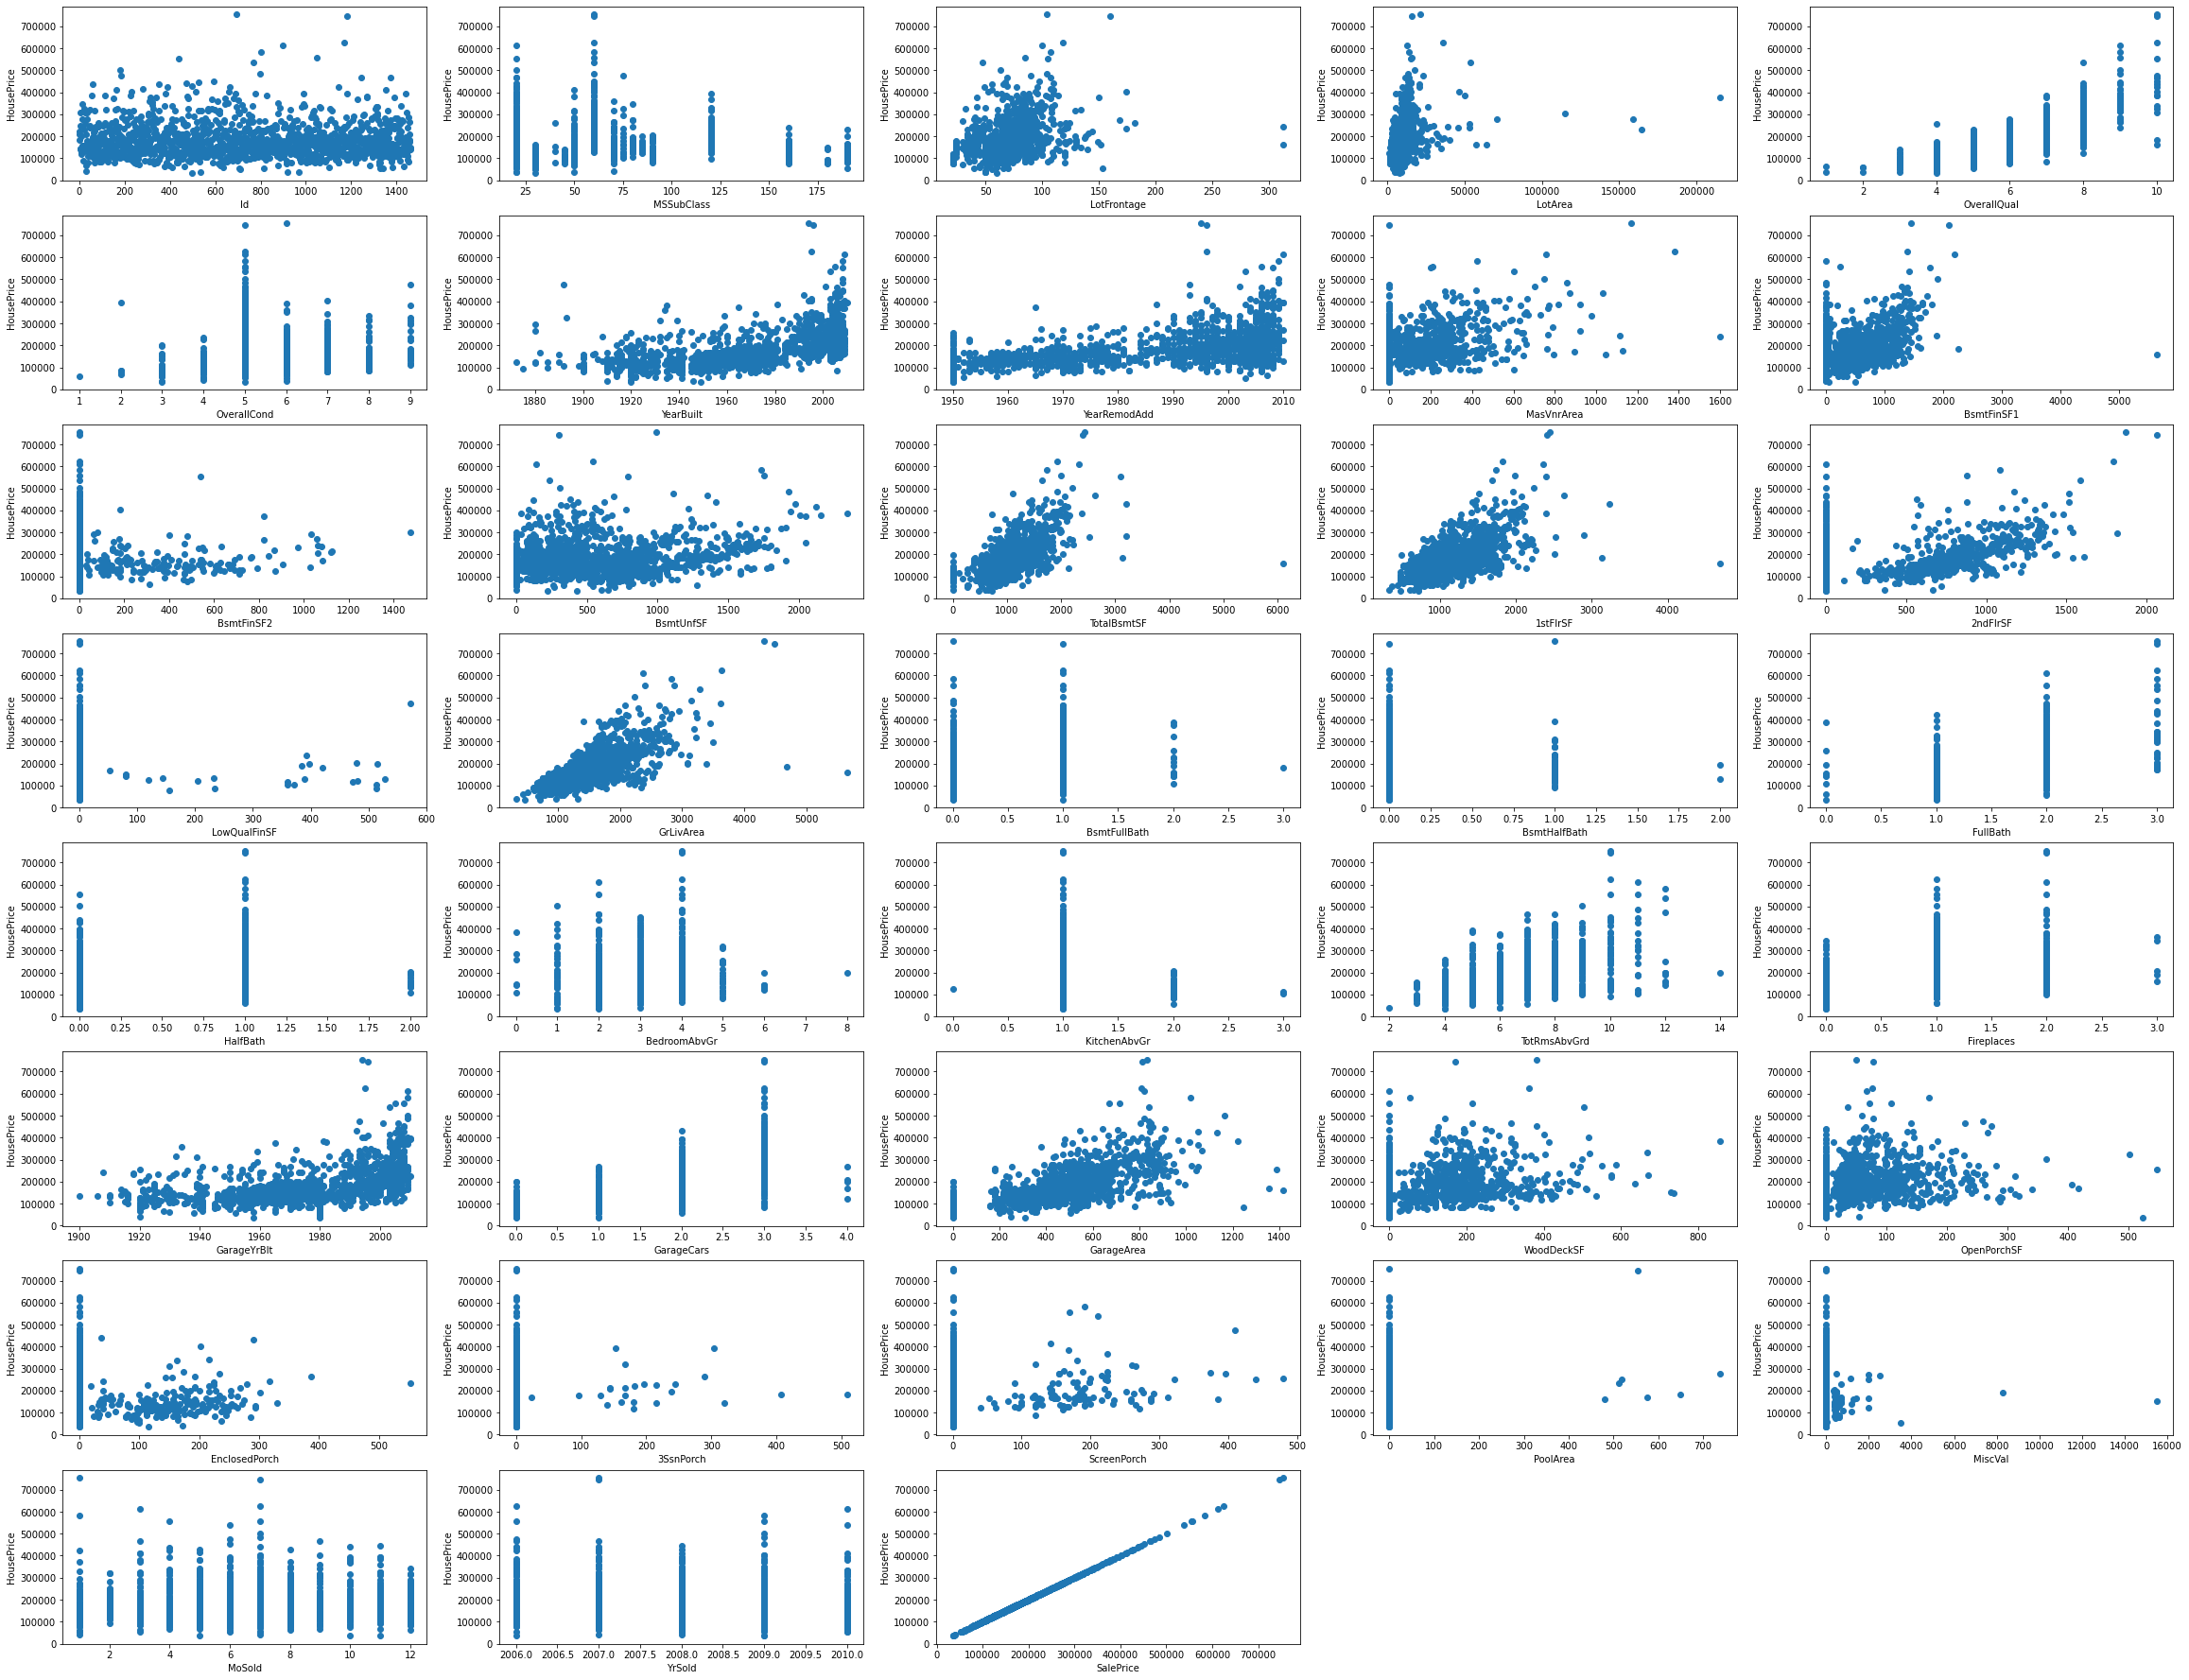

In [130]:
j=0
plt.figure(figsize=(40,40))
for column in numerical_columns:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1

In [131]:
# 20 is threashold value(user defined)
descriteCols=[]
continousCols=[]

for column in numerical_columns:
    if train[column].nunique()>20:
        continousCols.append(column)
    else:
        descriteCols.append(column)
print(f"{continousCols}continousCols")
print(f"{descriteCols}descriteCols")


['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']continousCols
['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold', 'YrSold']descriteCols


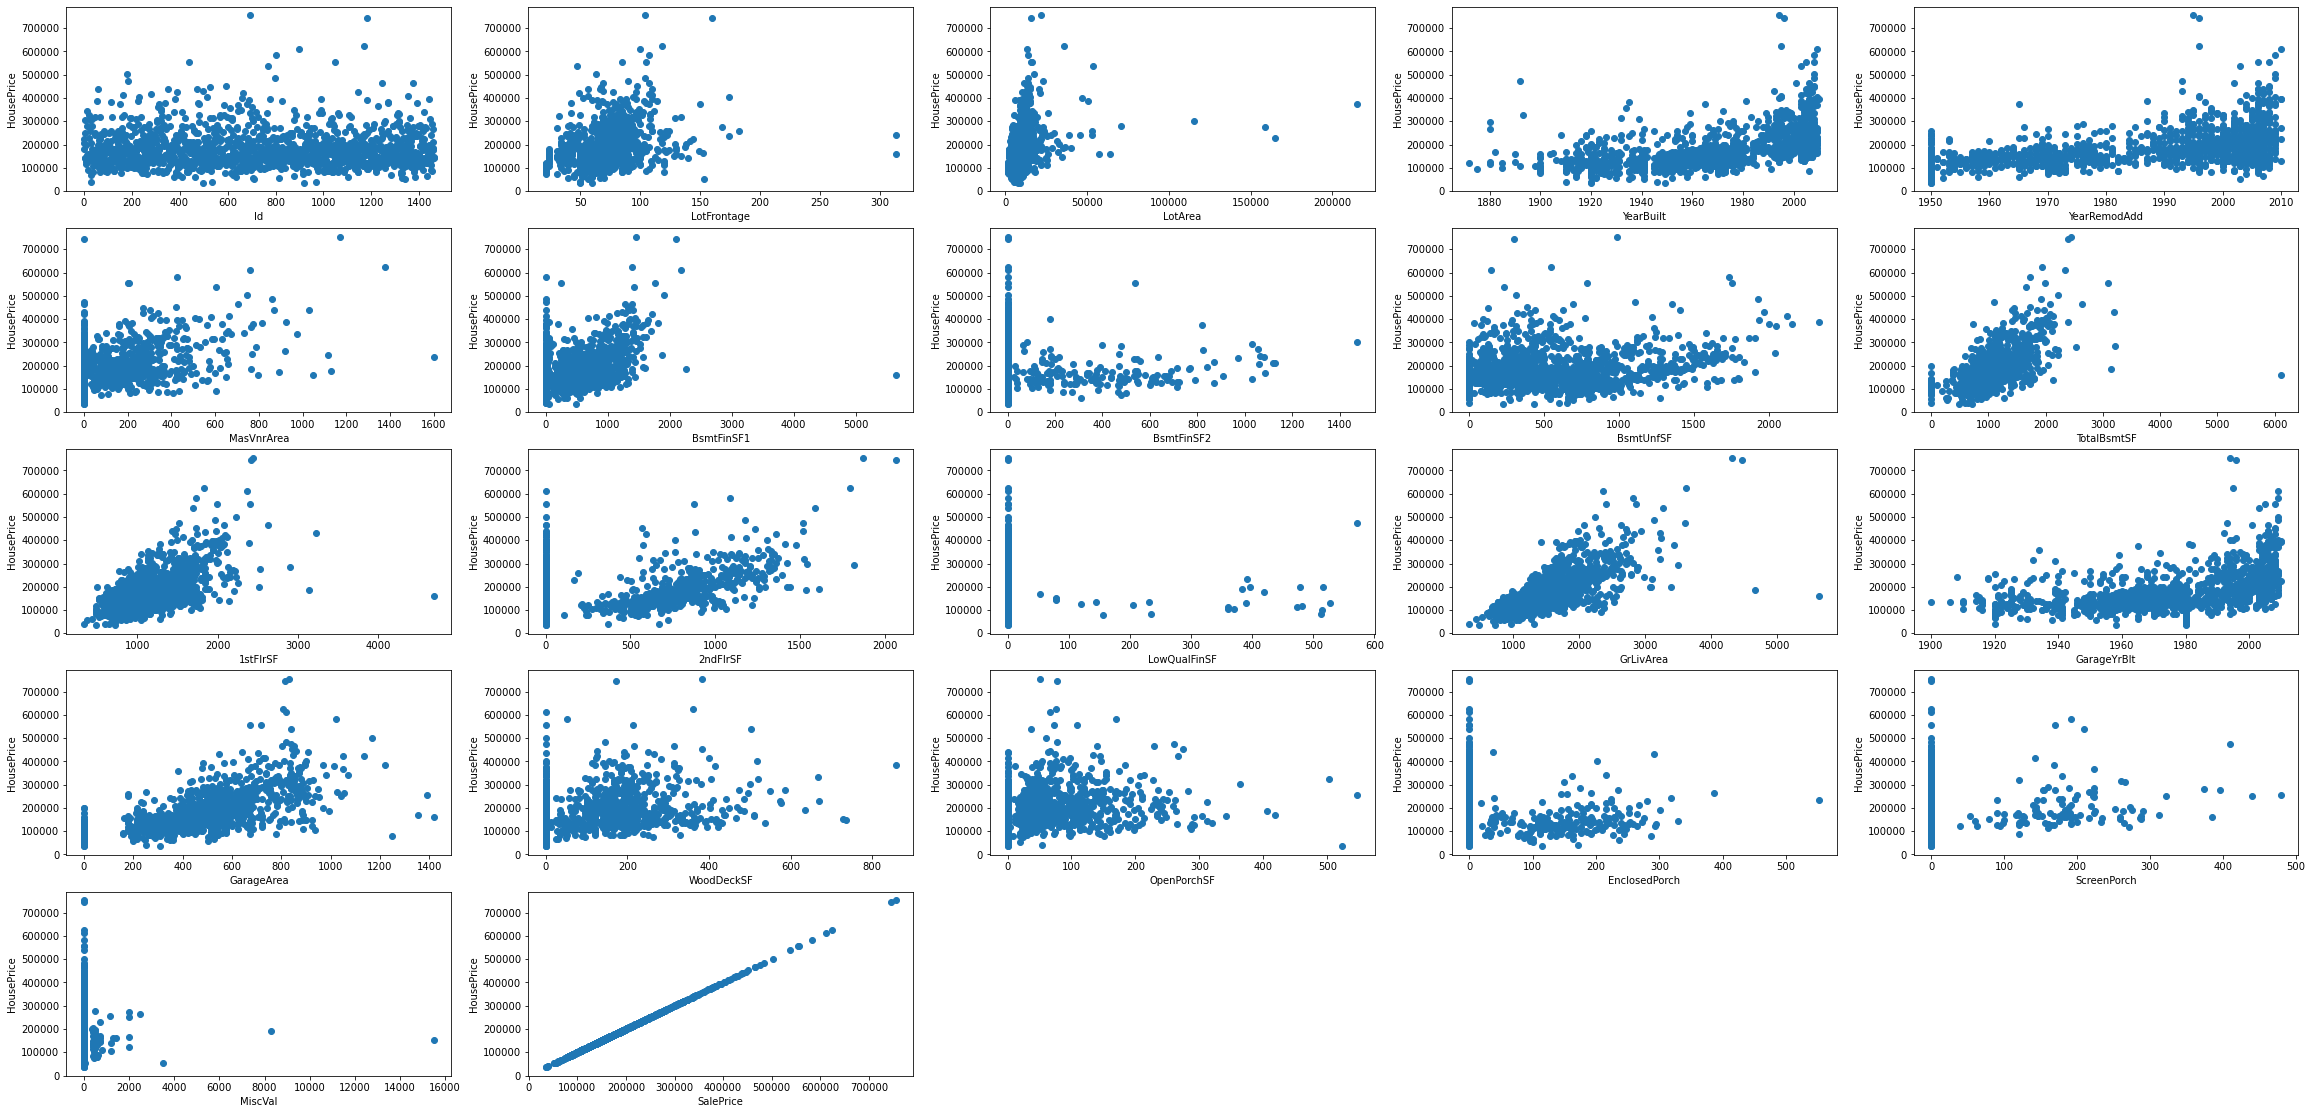

In [132]:
j=0
plt.figure(figsize=(40,40))
for column in continousCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1

In [133]:
descriteCols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

In [134]:
obsevationVal=train.groupby(['MSSubClass'])['SalePrice'].mean()
obsevationVal
obsevationVal_df=pd.DataFrame(obsevationVal).sort_values(by='SalePrice',ascending=False)
obsevationVal_df.reset_index(inplace=True)
obsevationVal_df

,MSSubClass,SalePrice
0,60,239948.501672
1,120,200779.080460
2,75,192437.500000
3,20,185224.811567
4,80,169736.551724
5,70,166772.416667
6,40,156125.000000
7,85,147810.000000
8,50,143302.972222
9,160,138647.380952


<BarContainer object of 15 artists>

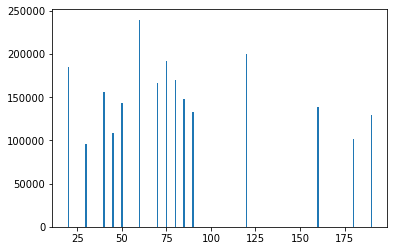

In [135]:
plt.bar(obsevationVal_df['MSSubClass'],obsevationVal_df['SalePrice'])

In [136]:
obsevationVal=train.groupby(['OverallQual'])['SalePrice'].mean()
obsevationVal
obsevationVal_df=pd.DataFrame(obsevationVal).sort_values(by='SalePrice',ascending=False)
obsevationVal_df.reset_index(inplace=True)
obsevationVal_df

,OverallQual,SalePrice
0,10,438588.388889
1,9,367513.023256
2,8,274735.535714
3,7,207716.423197
4,6,161603.034759
5,5,133523.347607
6,4,108420.655172
7,3,87473.750000
8,2,51770.333333
9,1,50150.000000


<BarContainer object of 10 artists>

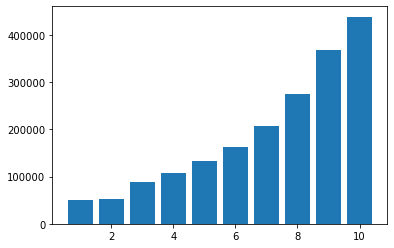

In [137]:
plt.bar(obsevationVal_df['OverallQual'],obsevationVal_df['SalePrice'])

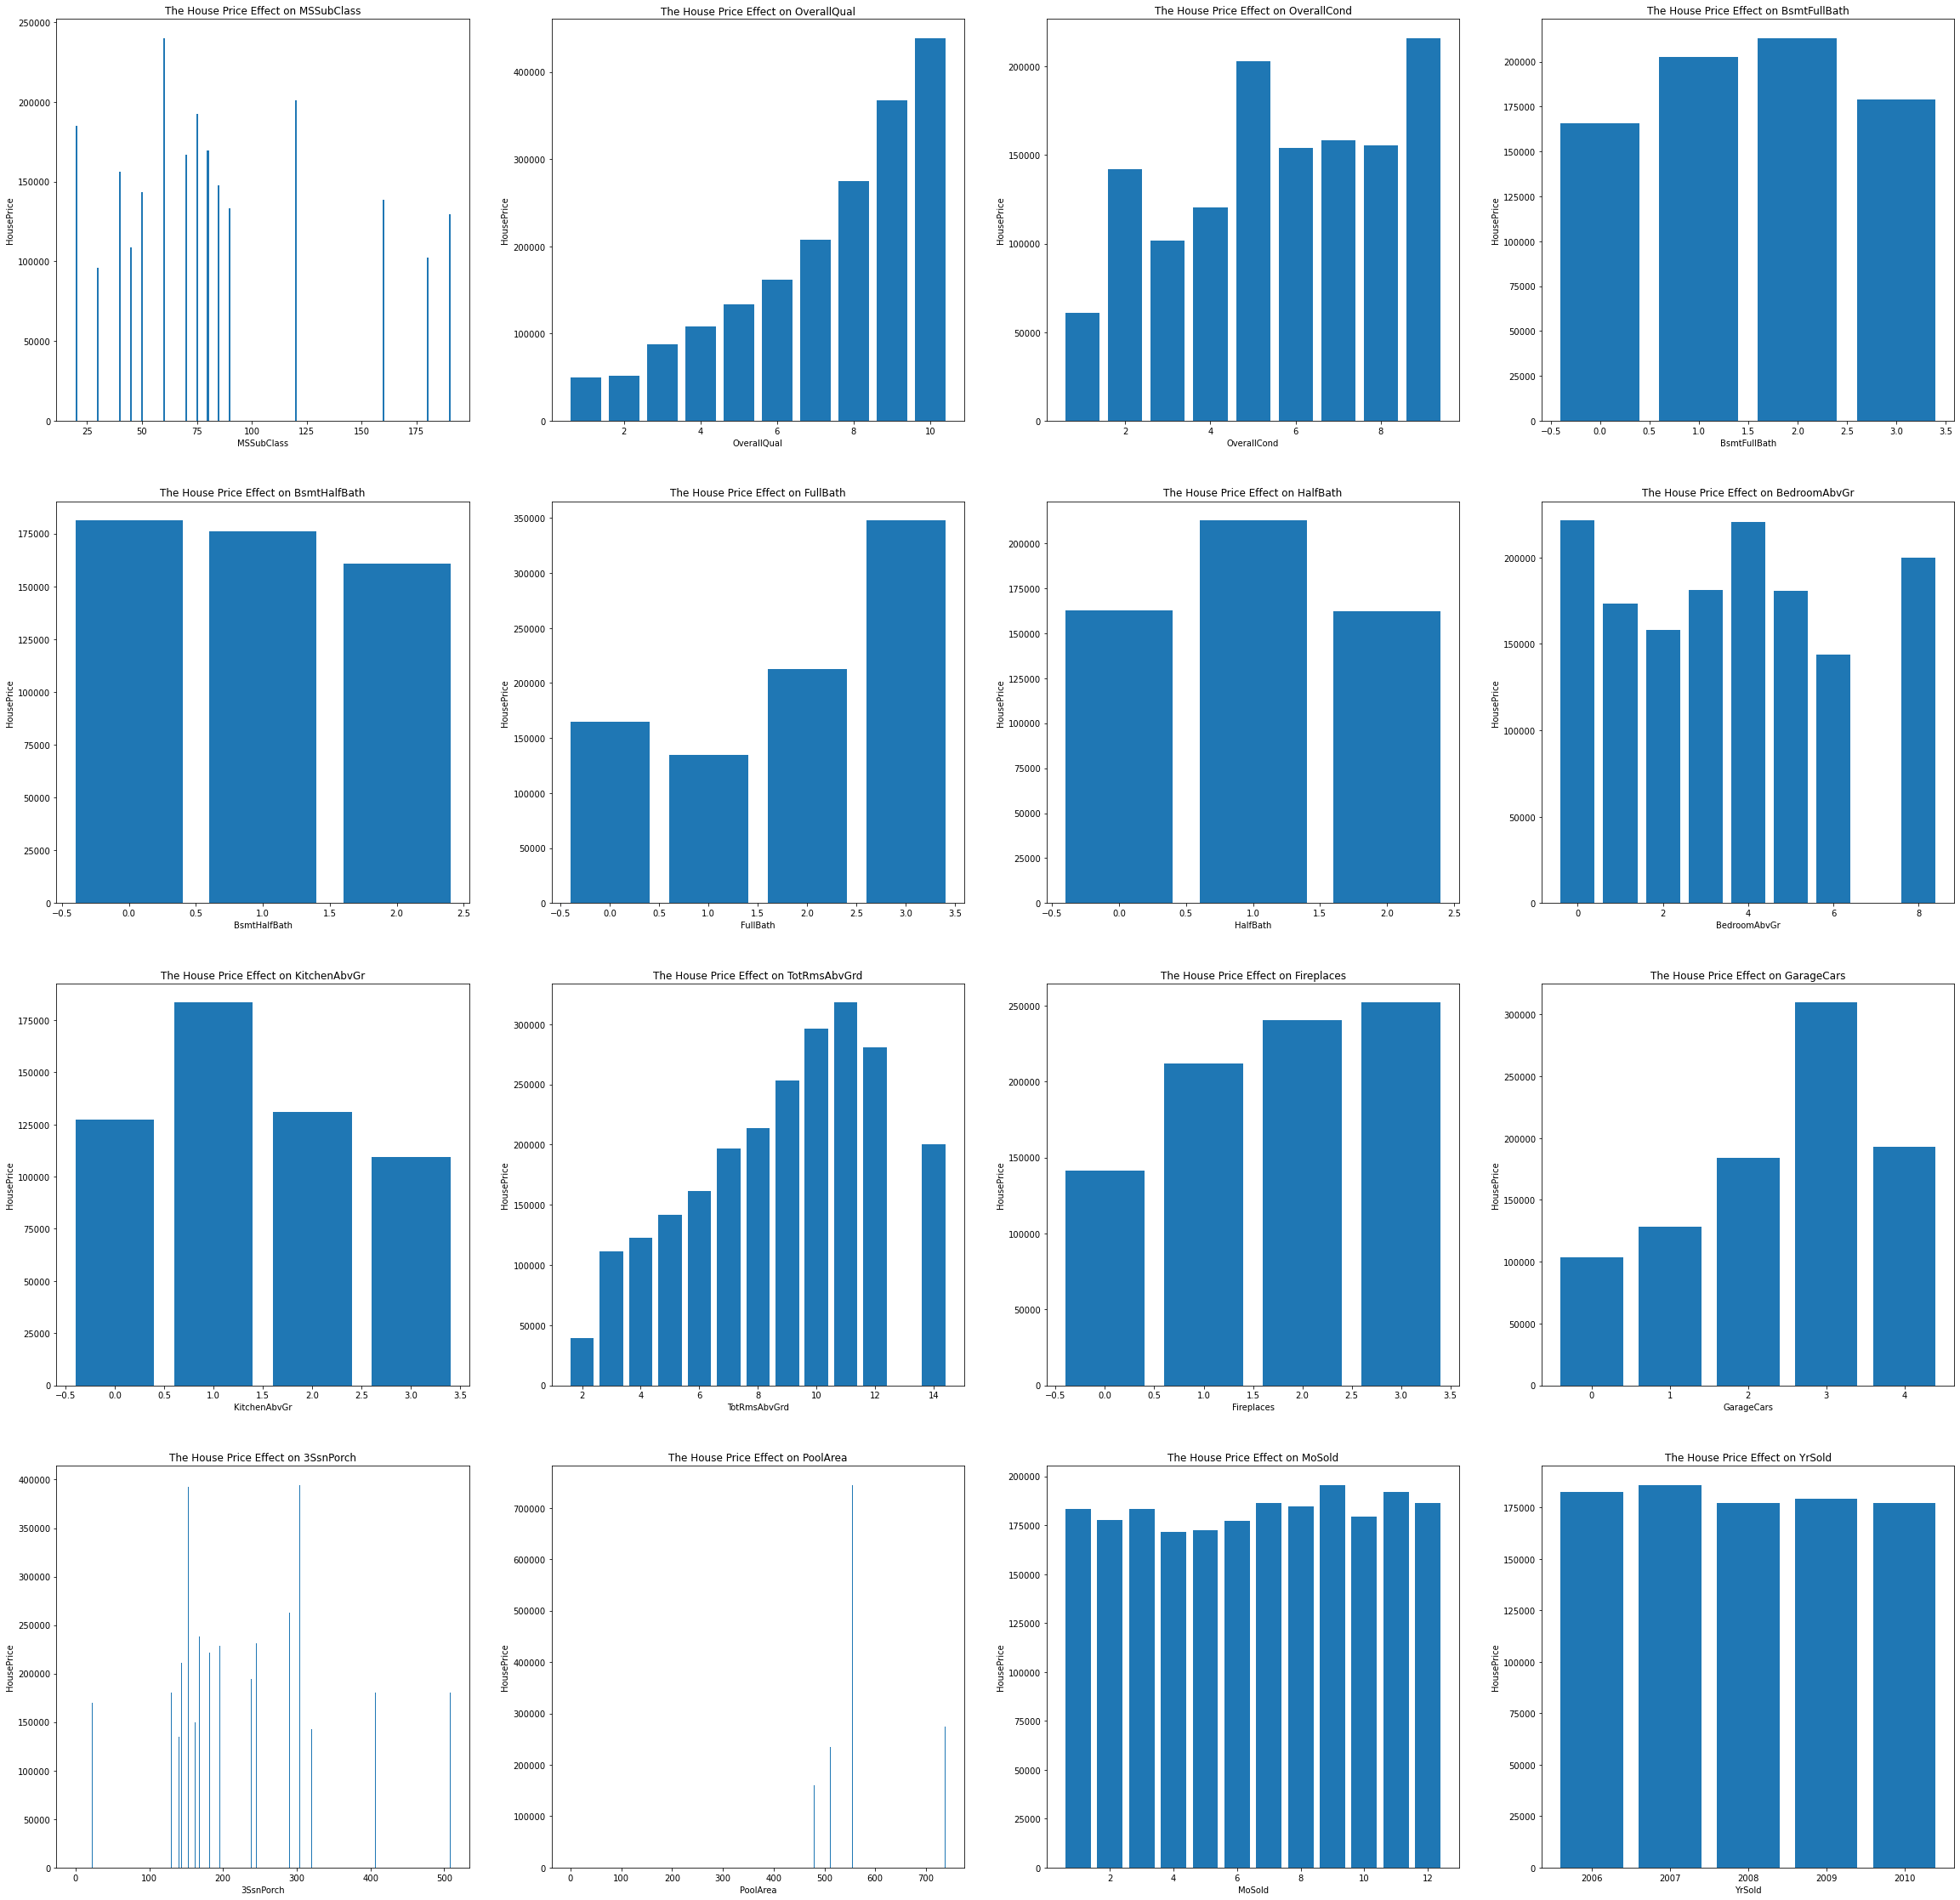

In [138]:
j=0
plt.figure(figsize=(40,40))
for column in descriteCols:
    plt.subplot(4,4,j+1)
    obsevationVal=train.groupby([column])['SalePrice'].mean()
    obsevationVal_df=pd.DataFrame(obsevationVal).sort_values(by='SalePrice',ascending=False)
    obsevationVal_df.reset_index(inplace=True)
    plt.bar(obsevationVal_df[column],obsevationVal_df['SalePrice'])
    plt.title(f"The House Price Effect on {column}")
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1

In [139]:
train.shape

(1460, 76)

In [140]:
object_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [141]:
len(object_columns)

38

In [142]:
obsevationVal=train.groupby(['MSZoning'])['SalePrice'].mean()
obsevationVal
obsevationVal_df=pd.DataFrame(obsevationVal).sort_values(by='SalePrice',ascending=False)
obsevationVal_df.reset_index(inplace=True)
obsevationVal_df

,MSZoning,SalePrice
0,FV,214014.061538
1,RL,191004.994787
2,RH,131558.375000
3,RM,126316.830275
4,C (all),74528.000000


<BarContainer object of 5 artists>

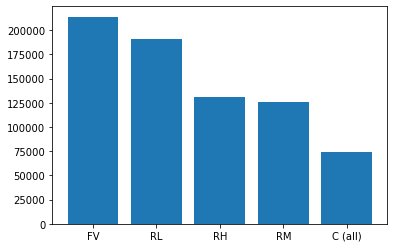

In [143]:
plt.bar(obsevationVal_df['MSZoning'],obsevationVal_df['SalePrice'])

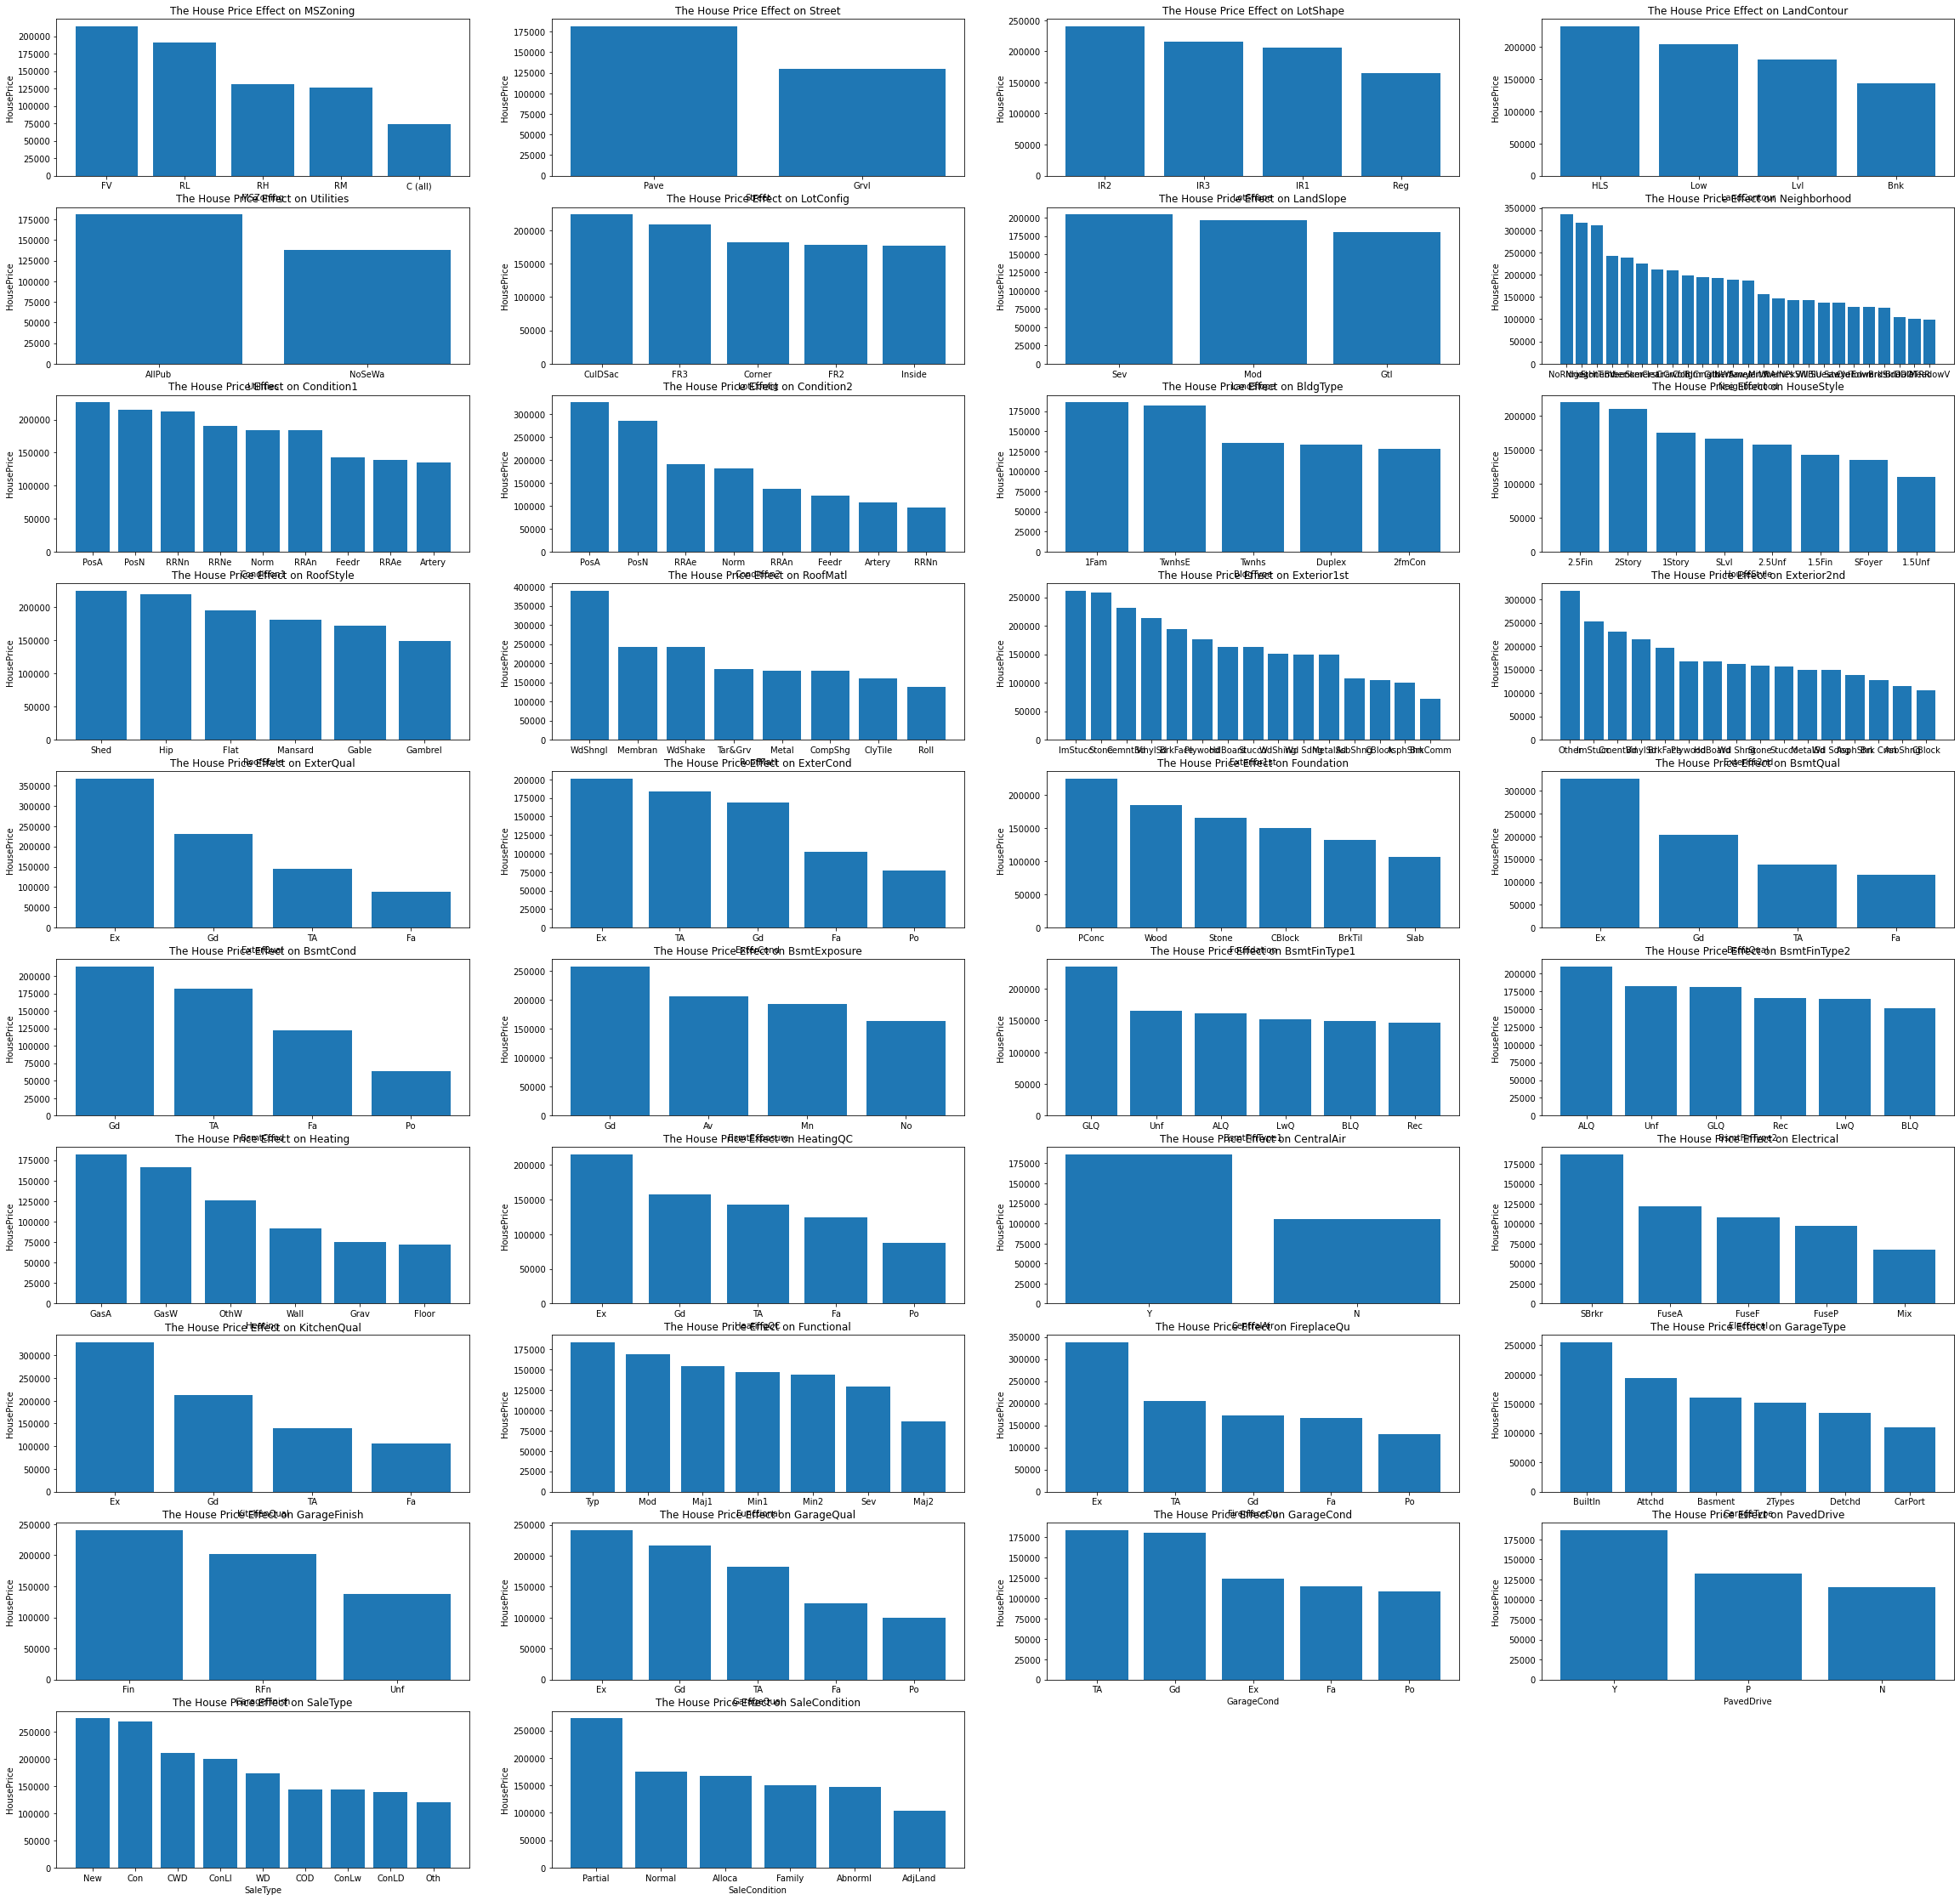

In [144]:
j=0
plt.figure(figsize=(40,40))
for column in object_columns:
    plt.subplot(10,4,j+1)
    obsevationVal=train.groupby([column])['SalePrice'].mean()
    obsevationVal_df=pd.DataFrame(obsevationVal).sort_values(by='SalePrice',ascending=False)
    obsevationVal_df.reset_index(inplace=True)
    plt.bar(obsevationVal_df[column],obsevationVal_df['SalePrice'])
    plt.title(f"The House Price Effect on {column}")
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1

Outlier Treatment

In [145]:
continousCols

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [146]:
train.shape

(1460, 76)

In [147]:
# standard deviation method
upper_lim=train['LotFrontage'].mean()+train['LotFrontage'].std()*3
lower_lim=train['LotFrontage'].mean()-train['LotFrontage'].std()*3

In [148]:
upper_lim

135.9467298969942

In [149]:
lower_lim

3.780667363279747

In [150]:
train[(train['LotFrontage']<upper_lim) & (train['LotFrontage']>lower_lim)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [151]:
1460-1444

16

In [152]:
#better is standard deviation only 16 rows is there
train.loc[train['LotFrontage']>upper_lim,'LotFrontage']

171     141.0
197     174.0
231     174.0
277     140.0
313     150.0
446     137.0
807     144.0
909     149.0
934     313.0
1107    168.0
1127    182.0
1173    138.0
1182    160.0
1211    152.0
1298    313.0
1337    153.0
Name: LotFrontage, dtype: float64

In [153]:
train.loc[train['LotFrontage']>upper_lim,'LotFrontage']=upper_lim

In [154]:
train[(train['LotFrontage']<=upper_lim) & (train['LotFrontage']>=lower_lim)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [155]:
for feature in continousCols:
    upper_lim=train[feature].mean()+train[feature].std()*3
    lower_lim=train[feature].mean()-train[feature].std()*3

    train.loc[train[feature]>upper_lim,feature]=upper_lim
    train.loc[train[feature]<lower_lim,feature]=lower_lim

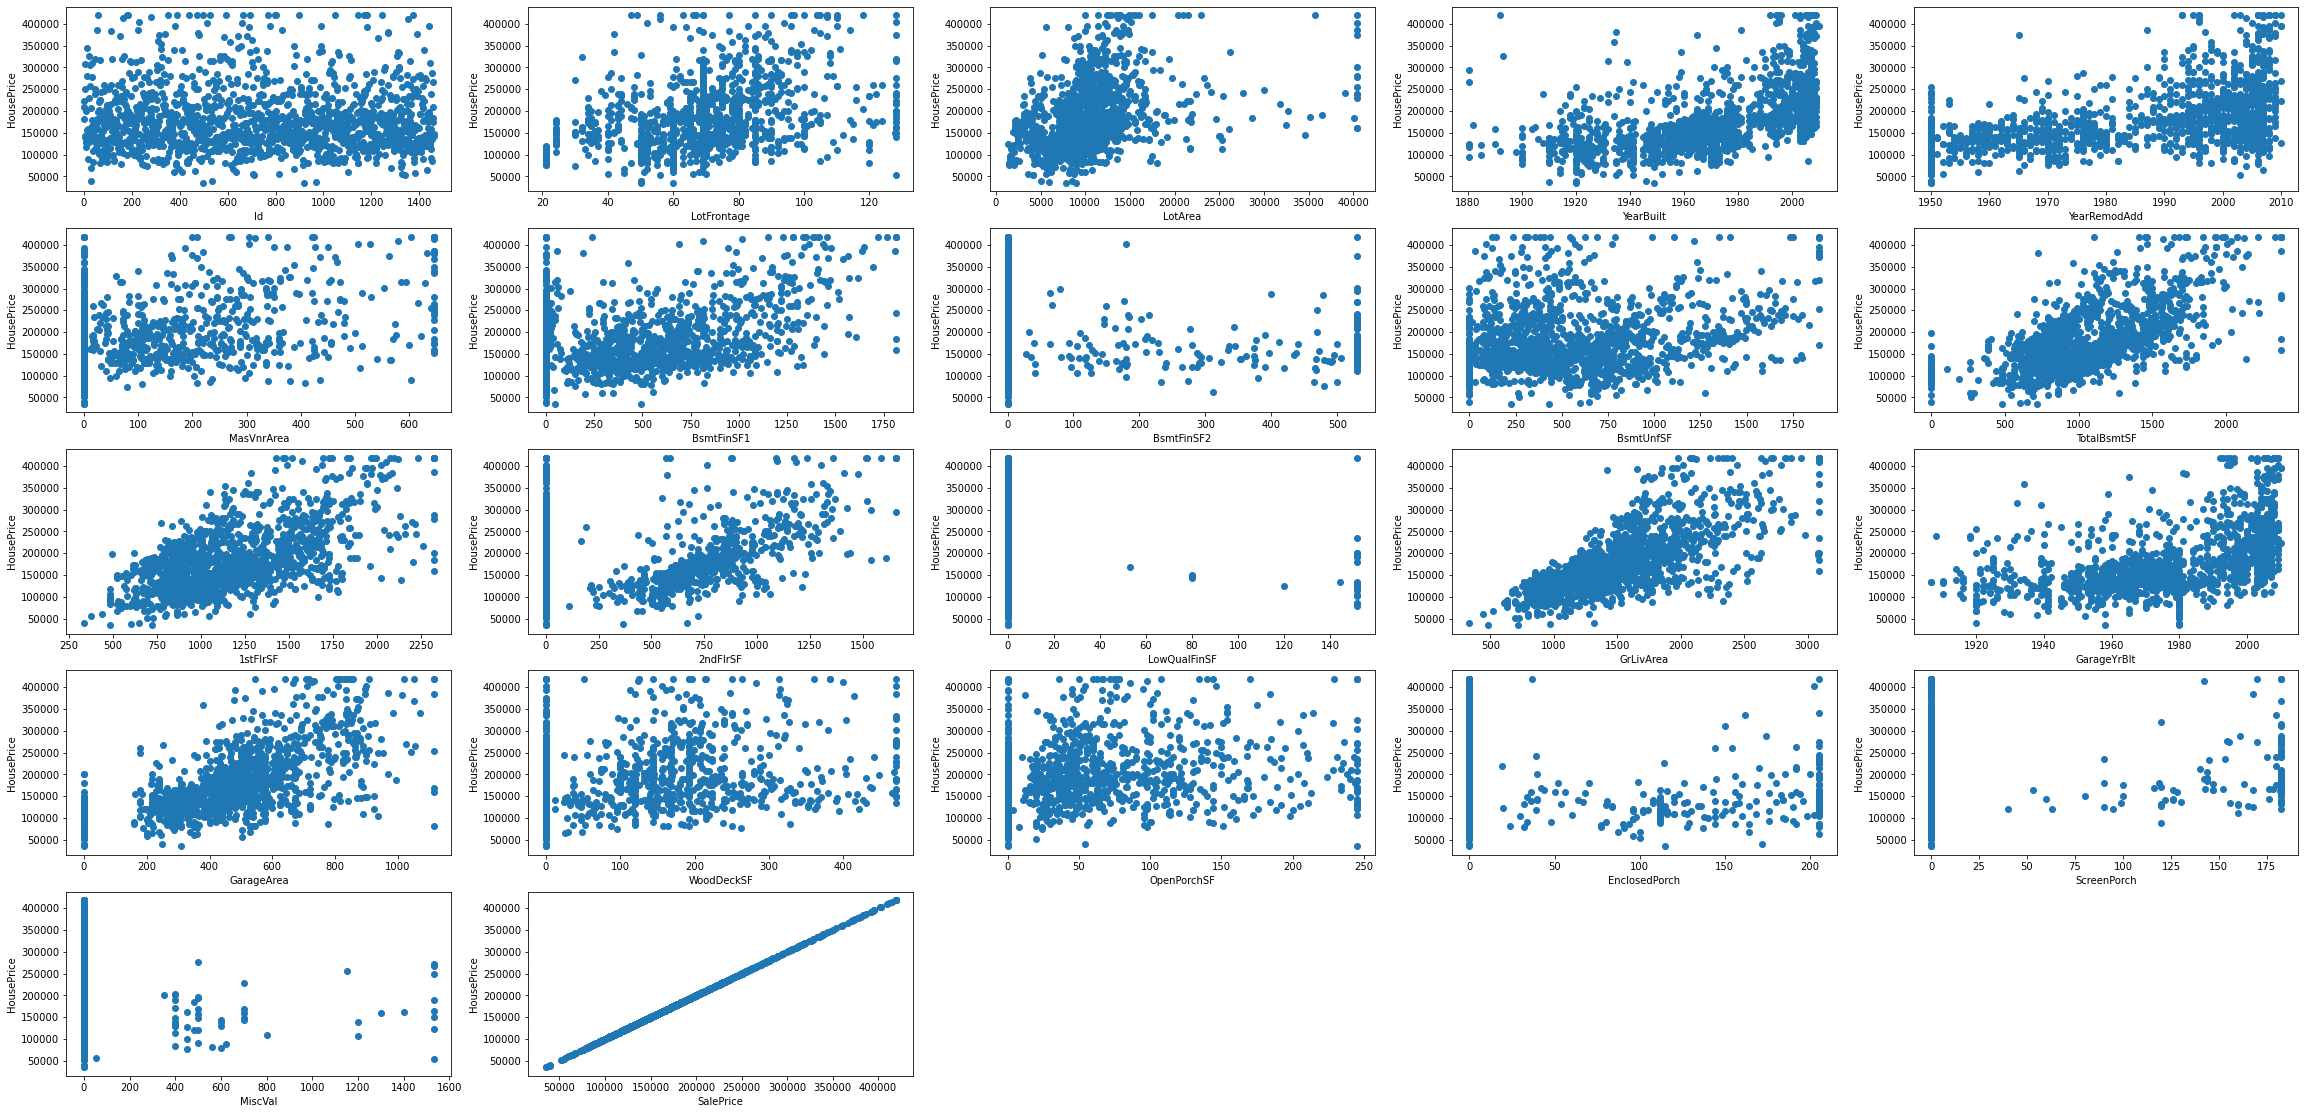

In [156]:
j=0
plt.figure(figsize=(40,40))
for column in continousCols:
    plt.subplot(10,5,j+1)
    plt.scatter(train[column],train['SalePrice'])
    plt.xlabel(column)
    plt.ylabel('HousePrice')
    j+=1

Encoding

In [157]:
len(object_columns)

38

In [158]:
object_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [159]:
from collections import defaultdict
defaultEncoder=defaultdict(LabelEncoder)

In [160]:
train[object_columns]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


In [161]:
trainobjectDF=train[object_columns]

In [162]:
fit_trainobjectDF=trainobjectDF.apply(lambda x: defaultEncoder[x.name].fit_transform(x))
fit_trainobjectDF

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,2,6,2,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,3,6,4,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,2,6,4,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,2,6,2,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,3,6,4,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,3,2,4,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,2,6,2,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,2,6,2,1,2,4,4,2,8,4


In [163]:
defaultEncoder['Street'].transform(["Pave"])

array([1])

In [164]:
defaultEncoder['LotShape'].transform(["Reg"])

array([3])

In [165]:
train.drop(object_columns,axis=1,inplace=True)

In [166]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.000000,0,0.0,0,0.0,2,2008,208500.0
1,2.0,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.000000,0,0.0,0,0.0,5,2007,181500.0
2,3.0,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.000000,0,0.0,0,0.0,9,2008,223500.0
3,4.0,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,...,0.0,35.0,205.311555,0,0.0,0,0.0,2,2006,140000.0
4,5.0,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.000000,0,0.0,0,0.0,12,2008,250000.0


In [167]:
pd.concat([train,fit_trainobjectDF],axis=1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1.0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,...,2,6,2,1,1,4,4,2,8,4
1,2.0,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,...,3,6,4,1,1,4,4,2,8,4
2,3.0,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,...,2,6,4,1,1,4,4,2,8,4
3,4.0,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,...,2,6,2,5,2,4,4,2,8,0
4,5.0,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,...,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60,62.0,7917.0,6,5,1999.0,2000.0,0.0,0.0,...,3,6,4,1,1,4,4,2,8,4
1456,1457.0,20,85.0,13175.0,6,6,1978.0,1988.0,119.0,790.0,...,3,2,4,1,2,4,4,2,8,4
1457,1458.0,70,66.0,9042.0,7,9,1941.0,2006.0,0.0,275.0,...,2,6,2,1,1,4,4,2,8,4
1458,1459.0,20,68.0,9717.0,5,6,1950.0,1996.0,0.0,49.0,...,2,6,2,1,2,4,4,2,8,4


In [168]:
updated_train=pd.concat([train,fit_trainobjectDF],axis=1)

In [169]:
updated_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1.0,60,65.0,8450.0,7,5,2003.0,2003.0,196.0,706.0,...,2,6,2,1,1,4,4,2,8,4
1,2.0,20,80.0,9600.0,6,8,1976.0,1976.0,0.0,978.0,...,3,6,4,1,1,4,4,2,8,4
2,3.0,60,68.0,11250.0,7,5,2001.0,2002.0,162.0,486.0,...,2,6,4,1,1,4,4,2,8,4
3,4.0,70,60.0,9550.0,7,5,1915.0,1970.0,0.0,216.0,...,2,6,2,5,2,4,4,2,8,0
4,5.0,60,84.0,14260.0,8,5,2000.0,2000.0,350.0,655.0,...,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60,62.0,7917.0,6,5,1999.0,2000.0,0.0,0.0,...,3,6,4,1,1,4,4,2,8,4
1456,1457.0,20,85.0,13175.0,6,6,1978.0,1988.0,119.0,790.0,...,3,2,4,1,2,4,4,2,8,4
1457,1458.0,70,66.0,9042.0,7,9,1941.0,2006.0,0.0,275.0,...,2,6,2,1,1,4,4,2,8,4
1458,1459.0,20,68.0,9717.0,5,6,1950.0,1996.0,0.0,49.0,...,2,6,2,1,2,4,4,2,8,4


Correlation

In [170]:
cor_DF=updated_train.corr()
cor_DF

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,1.000000,0.011156,-0.024682,-0.008011,-0.028365,0.012609,-0.012318,-0.021998,-0.048035,-0.013464,...,-0.004432,-0.001064,0.004644,0.000195,-0.011390,-0.003230,-0.018025,0.005971,0.019773,-0.005806
MSSubClass,0.011156,1.000000,-0.400658,-0.279702,0.032628,-0.059316,0.027944,0.040581,0.020520,-0.073235,...,0.010129,0.003711,0.033443,0.090719,0.012301,0.007630,0.002927,-0.059925,0.012464,-0.024940
LotFrontage,-0.024682,-0.400658,1.000000,0.455607,0.237468,-0.059285,0.126277,0.076991,0.187109,0.146296,...,-0.185197,0.030656,0.072320,-0.236666,-0.222537,0.051435,0.043985,0.097751,-0.033825,0.066170
LotArea,-0.008011,-0.279702,0.455607,1.000000,0.181943,-0.015925,0.037913,0.038069,0.153834,0.239187,...,-0.114712,-0.044227,0.097239,-0.175576,-0.168933,0.019339,0.038518,0.014115,0.001833,0.045476
OverallQual,-0.028365,0.032628,0.237468,0.181943,1.000000,-0.091932,0.573183,0.550684,0.416804,0.230085,...,-0.555348,0.161047,0.064349,-0.297995,-0.538529,0.090562,0.144988,0.229393,-0.060472,0.193703
OverallCond,0.012609,-0.059316,-0.059285,-0.015925,-0.091932,1.000000,-0.376205,0.073741,-0.131177,-0.044549,...,0.067984,0.094040,-0.032888,0.163126,0.191063,-0.094761,-0.032236,-0.062236,0.095267,0.017758
YearBuilt,-0.012318,0.027944,0.126277,0.037913,0.573183,-0.376205,1.000000,0.593659,0.328898,0.252930,...,-0.359384,0.154651,0.100749,-0.443934,-0.590385,0.304135,0.246913,0.427485,-0.052367,0.201311
YearRemodAdd,-0.021998,0.040581,0.076991,0.038069,0.550684,0.073741,0.593659,1.000000,0.182833,0.126435,...,-0.452431,0.079903,0.012054,-0.271764,-0.456786,0.130241,0.150579,0.168457,0.019647,0.221687
MasVnrArea,-0.048035,0.020520,0.187109,0.153834,0.416804,-0.131177,0.328898,0.182833,1.000000,0.250260,...,-0.263543,0.092105,0.069872,-0.178620,-0.278422,0.113714,0.071267,0.154841,-0.062240,0.085328
BsmtFinSF1,-0.013464,-0.073235,0.146296,0.239187,0.230085,-0.044549,0.252930,0.126435,0.250260,1.000000,...,-0.178807,0.044579,0.048346,-0.242146,-0.246545,0.127551,0.100624,0.197006,0.012959,0.027687


In [171]:
cor_DF['SalePrice']

Id              -0.028716
MSSubClass      -0.088248
LotFrontage      0.362129
LotArea          0.381589
OverallQual      0.810469
OverallCond     -0.079194
YearBuilt        0.550119
YearRemodAdd     0.534087
MasVnrArea       0.468188
BsmtFinSF1       0.398349
BsmtFinSF2      -0.039318
BsmtUnfSF        0.218271
TotalBsmtSF      0.649209
1stFlrSF         0.629285
2ndFlrSF         0.306770
LowQualFinSF    -0.052332
GrLivArea        0.722471
BsmtFullBath     0.239062
BsmtHalfBath    -0.026792
FullBath         0.569415
HalfBath         0.289295
BedroomAbvGr     0.169804
KitchenAbvGr    -0.143346
TotRmsAbvGrd     0.533566
Fireplaces       0.477834
GarageYrBlt      0.488076
GarageCars       0.663012
GarageArea       0.650517
WoodDeckSF       0.339119
OpenPorchSF      0.358735
EnclosedPorch   -0.152807
3SsnPorch        0.050598
ScreenPorch      0.100159
PoolArea         0.059439
MiscVal         -0.041144
MoSold           0.060833
YrSold          -0.029711
SalePrice        1.000000
MSZoning    

In [172]:
cor_columns=abs(cor_DF['SalePrice']).sort_values(ascending=False)
cor_columns

SalePrice        1.000000
OverallQual      0.810469
GrLivArea        0.722471
GarageCars       0.663012
GarageArea       0.650517
TotalBsmtSF      0.649209
ExterQual        0.641007
1stFlrSF         0.629285
BsmtQual         0.624198
KitchenQual      0.590739
FullBath         0.569415
GarageFinish     0.558118
YearBuilt        0.550119
YearRemodAdd     0.534087
TotRmsAbvGrd     0.533566
GarageYrBlt      0.488076
Fireplaces       0.477834
MasVnrArea       0.468188
HeatingQC        0.417038
Foundation       0.400229
BsmtFinSF1       0.398349
LotArea          0.381589
LotFrontage      0.362129
OpenPorchSF      0.358735
WoodDeckSF       0.339119
GarageType       0.321506
2ndFlrSF         0.306770
BsmtExposure     0.298020
HalfBath         0.289295
CentralAir       0.267532
LotShape         0.261493
Electrical       0.249019
PavedDrive       0.245371
BsmtFullBath     0.239062
SaleCondition    0.231494
BsmtUnfSF        0.218271
RoofStyle        0.215822
Neighborhood     0.214781
HouseStyle  

In [173]:
cor_columns[cor_columns>0.4]

SalePrice       1.000000
OverallQual     0.810469
GrLivArea       0.722471
GarageCars      0.663012
GarageArea      0.650517
TotalBsmtSF     0.649209
ExterQual       0.641007
1stFlrSF        0.629285
BsmtQual        0.624198
KitchenQual     0.590739
FullBath        0.569415
GarageFinish    0.558118
YearBuilt       0.550119
YearRemodAdd    0.534087
TotRmsAbvGrd    0.533566
GarageYrBlt     0.488076
Fireplaces      0.477834
MasVnrArea      0.468188
HeatingQC       0.417038
Foundation      0.400229
Name: SalePrice, dtype: float64

In [174]:
len(cor_columns[cor_columns>0.4])

20

In [177]:
final_columns=cor_columns[cor_columns>0.4].index
final_columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'ExterQual', '1stFlrSF', 'BsmtQual', 'KitchenQual',
       'FullBath', 'GarageFinish', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'HeatingQC', 'Foundation'],
      dtype='object')

In [178]:
final_df=updated_train[final_columns]
final_df

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,208500.0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,181500.0,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,223500.0,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,140000.0,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,250000.0,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,6,1647.0,2,460.0,953.0,3,953.0,2,3,2,1,1999.0,2000.0,7,1999.0,1,0.0,0,2
1456,210000.0,6,2073.0,2,500.0,1542.0,3,2073.0,2,3,2,2,1978.0,1988.0,7,1978.0,2,119.0,4,1
1457,266500.0,7,2340.0,1,252.0,1152.0,0,1188.0,3,2,2,1,1941.0,2006.0,9,1941.0,2,0.0,0,4
1458,142125.0,5,1078.0,1,240.0,1078.0,3,1078.0,3,2,1,2,1950.0,1996.0,5,1950.0,0,0.0,2,1


In [179]:
y=final_df['SalePrice']

In [180]:
x=final_df.drop('SalePrice',axis=1)
x

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,7,1710.0,2,548.0,856.0,2,856.0,2,2,2,1,2003.0,2003.0,8,2003.0,0,196.0,0,2
1,6,1262.0,2,460.0,1262.0,3,1262.0,2,3,2,1,1976.0,1976.0,6,1976.0,1,0.0,0,1
2,7,1786.0,2,608.0,920.0,2,920.0,2,2,2,1,2001.0,2002.0,6,2001.0,1,162.0,0,2
3,7,1717.0,3,642.0,756.0,3,961.0,3,2,1,2,1915.0,1970.0,7,1998.0,1,0.0,2,0
4,8,2198.0,3,836.0,1145.0,2,1145.0,2,2,2,1,2000.0,2000.0,9,2000.0,1,350.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647.0,2,460.0,953.0,3,953.0,2,3,2,1,1999.0,2000.0,7,1999.0,1,0.0,0,2
1456,6,2073.0,2,500.0,1542.0,3,2073.0,2,3,2,2,1978.0,1988.0,7,1978.0,2,119.0,4,1
1457,7,2340.0,1,252.0,1152.0,0,1188.0,3,2,2,1,1941.0,2006.0,9,1941.0,2,0.0,0,4
1458,5,1078.0,1,240.0,1078.0,3,1078.0,3,2,1,2,1950.0,1996.0,5,1950.0,0,0.0,2,1


In [186]:
import scipy.stats as stat
import pylab

In [187]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

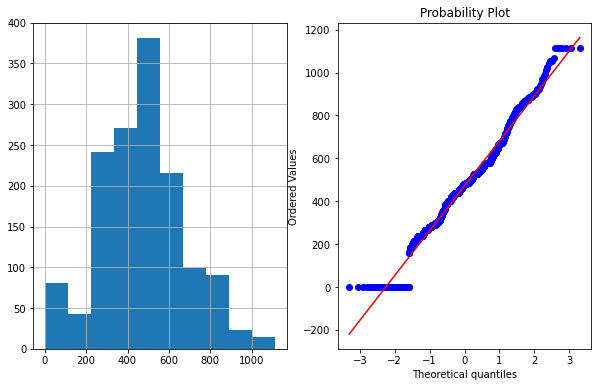

In [188]:
plot_data(x,'GarageArea')

Scale Down

In [189]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(x)

In [190]:
Actual_Df=pd.DataFrame(data)
Actual_Df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.651479,0.405597,0.311725,0.359263,-0.479591,-0.777976,-0.823993,-0.324152,-0.409369,0.789741,-0.281887,1.051867,0.878668,0.912210,1.018047,-0.951226,0.613070,-0.884658,0.835599
1,-0.071836,-0.497849,0.311725,-0.057853,0.512027,0.663451,0.281296,-0.324152,0.795629,0.789741,-0.281887,0.156536,-0.429577,-0.318683,-0.108202,0.600495,-0.617680,-0.884658,-0.549162
2,0.651479,0.558860,0.311725,0.643660,-0.323277,-0.777976,-0.649760,-0.324152,-0.409369,0.789741,-0.281887,0.985546,0.830215,-0.318683,0.934621,0.600495,0.399572,-0.884658,0.835599
3,0.651479,0.419713,1.650307,0.804818,-0.723832,0.663451,-0.538142,0.832969,-0.409369,-1.026041,0.950313,-1.866248,-0.720298,0.296763,0.809482,0.600495,-0.617680,0.265476,-1.933923
4,1.374795,1.389708,1.650307,1.724367,0.226265,-0.777976,-0.037223,-0.324152,-0.409369,0.789741,-0.281887,0.952386,0.733308,1.527656,0.892908,0.600495,1.580087,-0.884658,0.835599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.278550,0.311725,-0.057853,-0.242678,0.663451,-0.559921,-0.324152,0.795629,0.789741,-0.281887,0.919225,0.733308,0.296763,0.851195,0.600495,-0.617680,-0.884658,0.835599
1456,-0.071836,1.137631,0.311725,0.131745,1.195902,0.663451,2.489150,-0.324152,0.795629,0.789741,0.950313,0.222857,0.151865,0.296763,-0.024776,2.152216,0.129561,1.415610,-0.549162
1457,0.651479,1.676068,-1.026858,-1.043761,0.243362,-3.660830,0.079839,0.832969,-0.409369,0.789741,-0.281887,-1.004078,1.024029,1.527656,-1.568155,2.152216,-0.617680,-0.884658,3.605121
1458,-0.795151,-0.868907,-1.026858,-1.100641,0.062624,0.663451,-0.219623,0.832969,-0.409369,-1.026041,0.950313,-0.705634,0.539493,-0.934130,-1.192738,-0.951226,-0.617680,0.265476,-0.549162


In [191]:
Actual_Df.columns=[x]

In [192]:
Actual_Df

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,1stFlrSF,BsmtQual,KitchenQual,FullBath,GarageFinish,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GarageYrBlt,Fireplaces,MasVnrArea,HeatingQC,Foundation
0,0.651479,0.405597,0.311725,0.359263,-0.479591,-0.777976,-0.823993,-0.324152,-0.409369,0.789741,-0.281887,1.051867,0.878668,0.912210,1.018047,-0.951226,0.613070,-0.884658,0.835599
1,-0.071836,-0.497849,0.311725,-0.057853,0.512027,0.663451,0.281296,-0.324152,0.795629,0.789741,-0.281887,0.156536,-0.429577,-0.318683,-0.108202,0.600495,-0.617680,-0.884658,-0.549162
2,0.651479,0.558860,0.311725,0.643660,-0.323277,-0.777976,-0.649760,-0.324152,-0.409369,0.789741,-0.281887,0.985546,0.830215,-0.318683,0.934621,0.600495,0.399572,-0.884658,0.835599
3,0.651479,0.419713,1.650307,0.804818,-0.723832,0.663451,-0.538142,0.832969,-0.409369,-1.026041,0.950313,-1.866248,-0.720298,0.296763,0.809482,0.600495,-0.617680,0.265476,-1.933923
4,1.374795,1.389708,1.650307,1.724367,0.226265,-0.777976,-0.037223,-0.324152,-0.409369,0.789741,-0.281887,0.952386,0.733308,1.527656,0.892908,0.600495,1.580087,-0.884658,0.835599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.278550,0.311725,-0.057853,-0.242678,0.663451,-0.559921,-0.324152,0.795629,0.789741,-0.281887,0.919225,0.733308,0.296763,0.851195,0.600495,-0.617680,-0.884658,0.835599
1456,-0.071836,1.137631,0.311725,0.131745,1.195902,0.663451,2.489150,-0.324152,0.795629,0.789741,0.950313,0.222857,0.151865,0.296763,-0.024776,2.152216,0.129561,1.415610,-0.549162
1457,0.651479,1.676068,-1.026858,-1.043761,0.243362,-3.660830,0.079839,0.832969,-0.409369,0.789741,-0.281887,-1.004078,1.024029,1.527656,-1.568155,2.152216,-0.617680,-0.884658,3.605121
1458,-0.795151,-0.868907,-1.026858,-1.100641,0.062624,0.663451,-0.219623,0.832969,-0.409369,-1.026041,0.950313,-0.705634,0.539493,-0.934130,-1.192738,-0.951226,-0.617680,0.265476,-0.549162


In [193]:
col=Actual_Df.columns

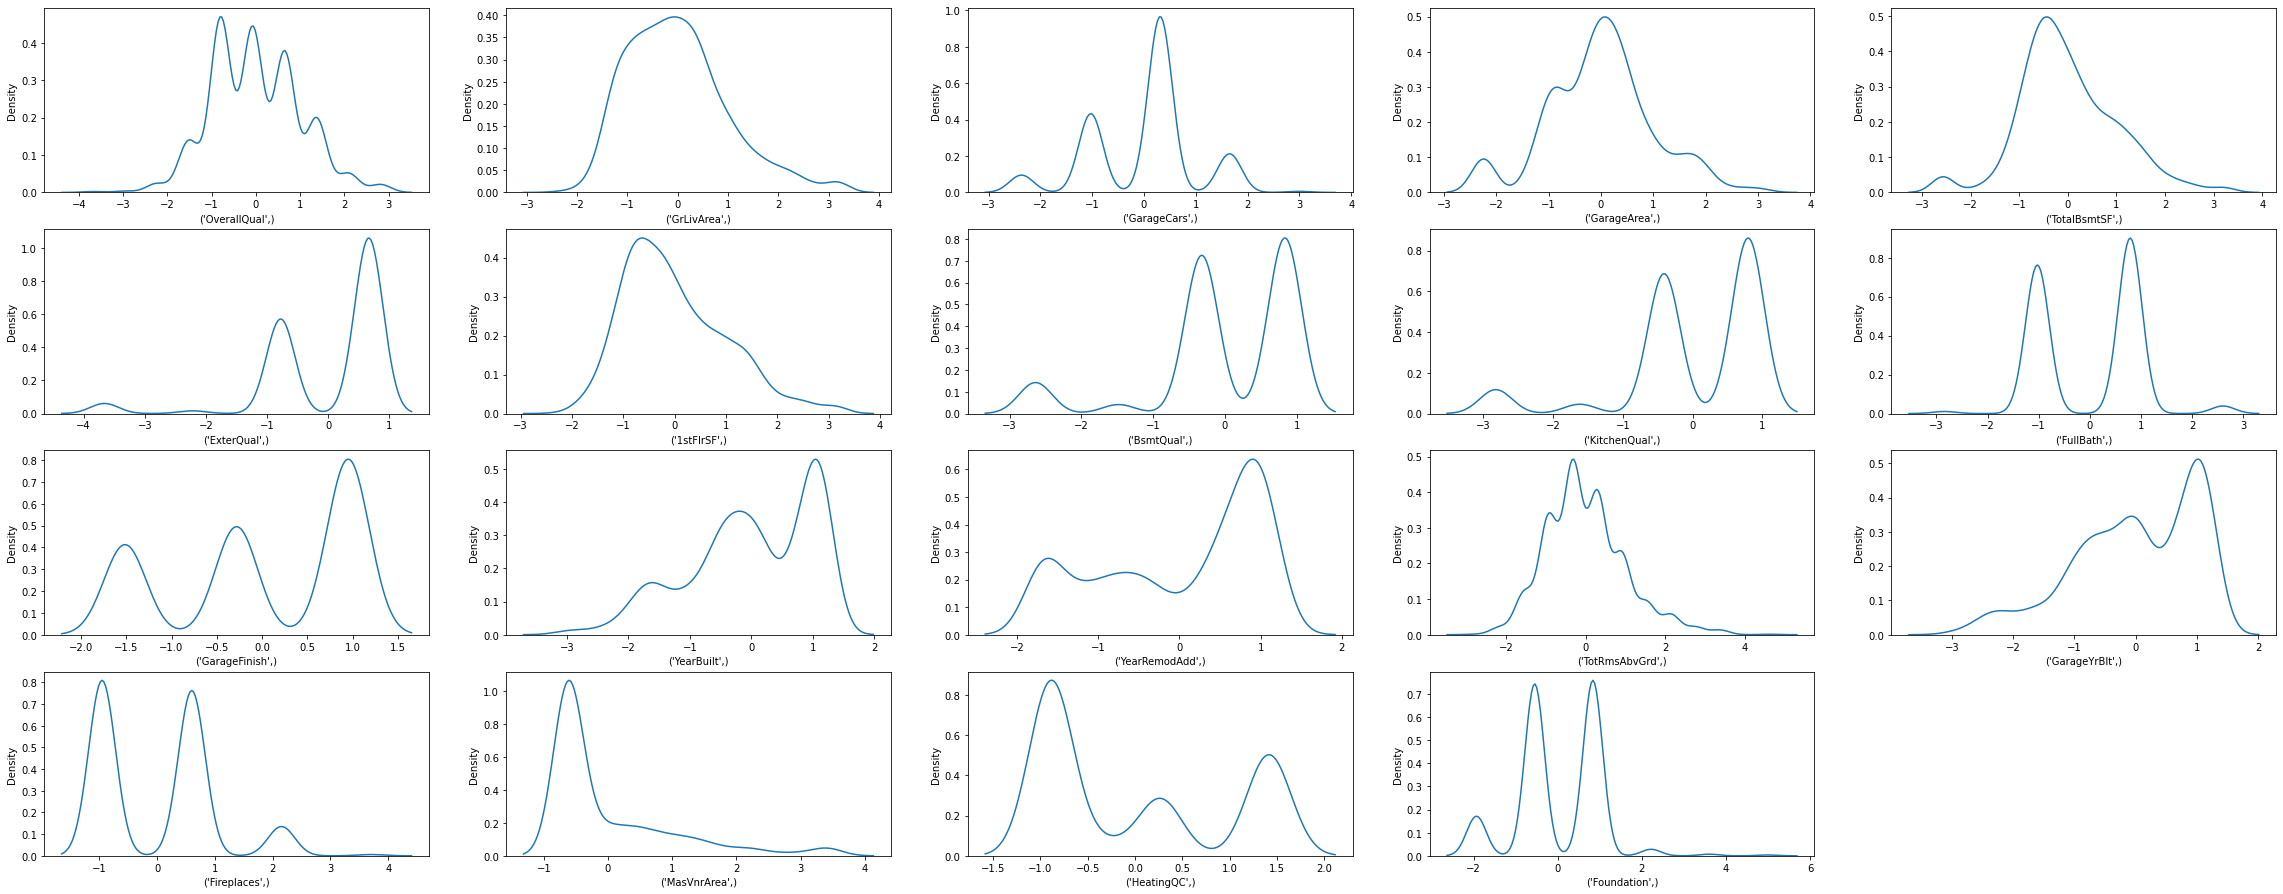

In [194]:
j=0
plt.figure(figsize=(40,40))
for column in col:
    plt.subplot(10,5,j+1)
    sns.kdeplot(Actual_Df[column])
    j+=1

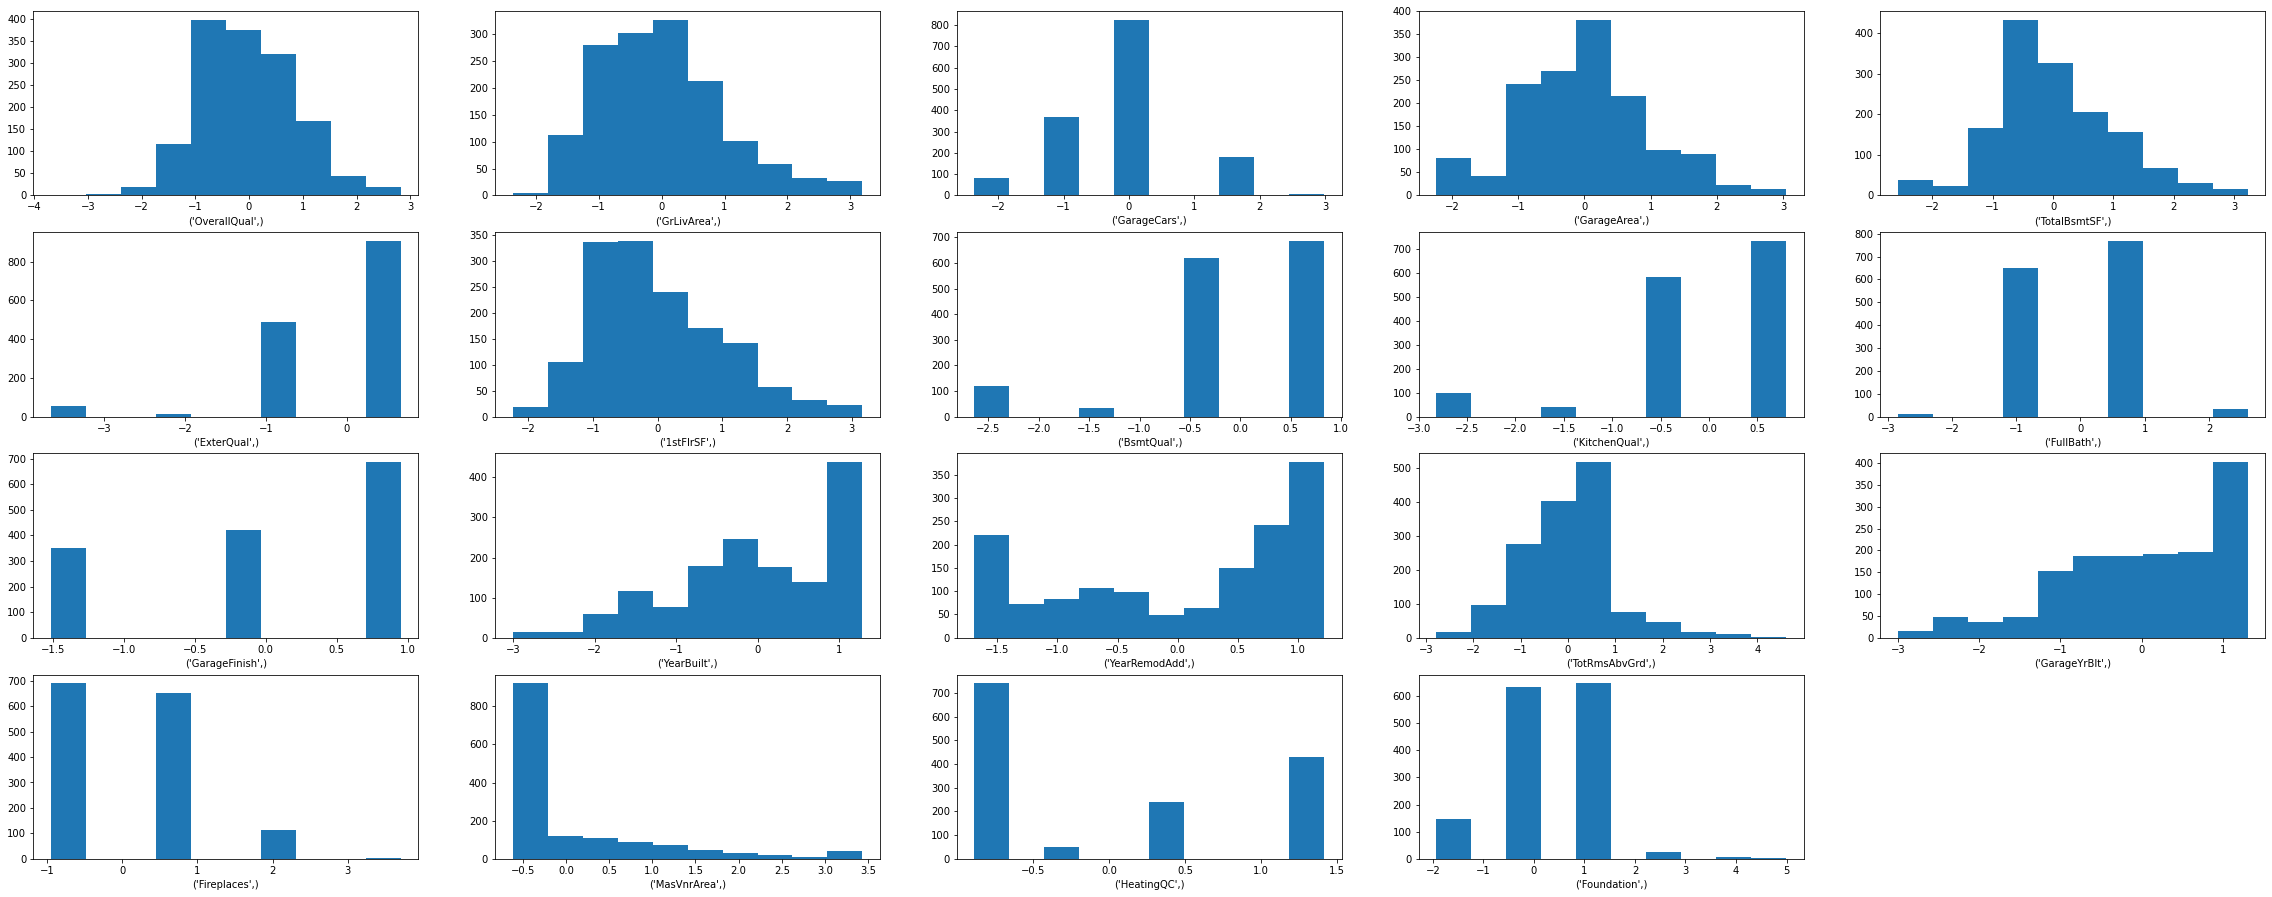

In [195]:
j=0
plt.figure(figsize=(40,40))
for column in col:
    plt.subplot(10,5,j+1)
    plt.hist(Actual_Df[column])
    plt.xlabel(column)
    j+=1